In [147]:
import numpy as np
import matplotlib.pyplot as plt

Text(0, 0.5, 'Overlap <AFM|ground state>')

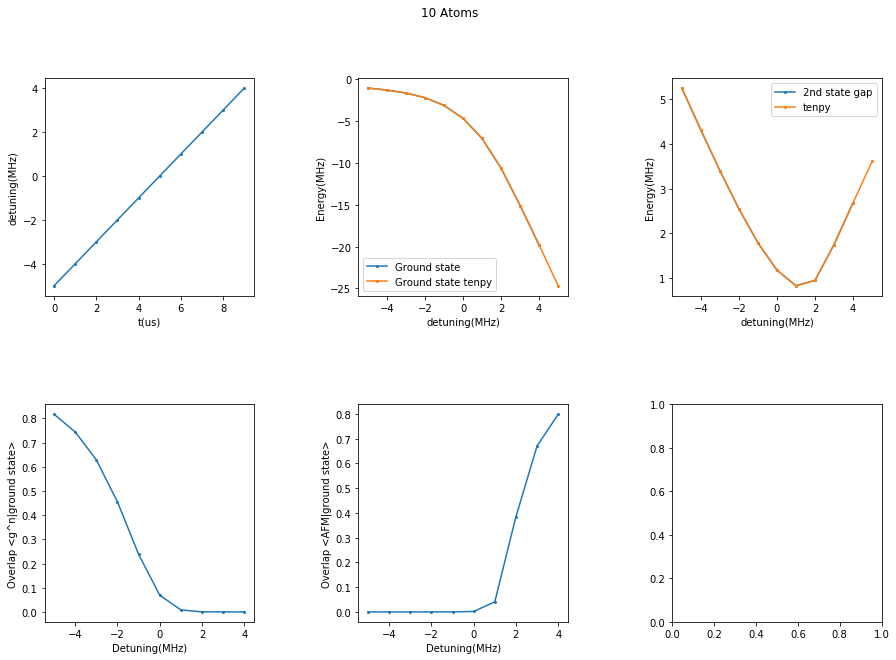

In [246]:
# dynamite data 
data = np.loadtxt('C:/Users/wangy/Rydberg simulation/rydberg_data/1_2_23/gap2023_01_02_21_57_07_ring_L10', delimiter = ',')
z0 = np.loadtxt('C:/Users/wangy/Rydberg simulation/rydberg_data/1_2_23/z02023_01_02_21_57_07_ring_L10', delimiter = ',')
zz0 = np.loadtxt('C:/Users/wangy/Rydberg simulation/rydberg_data/1_2_23/zz02023_01_02_21_57_07_ring_L10', delimiter = ',')

#    op_list1 = ['t','Detuning','E0','E1','overlap_g','overlap_afm','E2','E3']
ms = 2
ls = '-'
fig, ax = plt.subplots(2, 3, figsize=(15,10))
fig.suptitle('10 Atoms')
plt.subplots_adjust(wspace=0.5,hspace=0.5)
ax[0,0].plot(data[0],data[1],marker='o',markersize = ms,ls = ls)
ax[0,0].set_xlabel('t(us)')
ax[0,0].set_ylabel('detuning(MHz)')

ax[0,1].plot(data[1],data[2]/2/np.pi,marker='o',markersize = ms,ls = ls,label= 'Ground state')
ax[0,1].plot(detuning_tenpy,(E[:,0]+100)/2/np.pi,marker='o',markersize = ms,ls = ls,label= 'Ground state tenpy')
#ax[0,1].set_xlim([-4.5,0])
#ax[0,1].set_ylim([-20,0])


ax[0,1].set_ylabel('Energy(MHz)')
ax[0,1].set_xlabel('detuning(MHz)')
ax[0,1].legend()

#ax[0,2].plot(data[1],data[3]/2/np.pi-data[2]/2/np.pi,marker='o',markersize = ms,ls = ls,label= '1st state gap')
ax[0,2].plot(data[1],data[6]/2/np.pi-data[2]/2/np.pi,marker='o',markersize = ms,ls = ls,label= '2nd state gap')
ax[0,2].plot(detuning_tenpy,(E[:,2]-E[:,0])/2/np.pi,marker='o',markersize = ms,ls = ls,label= 'tenpy')
#ax[0,2].plot(detuning_tenpy,(E[:,1]-E[:,0])/2/np.pi,marker='o',markersize = ms,ls = ls,label= 'tenpy1')
#ax[0,2].plot(data[1],data[7]/2/np.pi-data[2]/2/np.pi,marker='o',markersize = ms,ls = ls,label= '3nd state gap')
ax[0,2].set_ylabel('Energy(MHz)')
ax[0,2].set_xlabel('detuning(MHz)')
ax[0,2].legend()

ax[1,0].plot(data[1],data[4],marker='o',markersize = ms,ls = ls)
ax[1,0].set_xlabel('Detuning(MHz)')
ax[1,0].set_ylabel('Overlap <g^n|ground state>')

ax[1,1].plot(data[1],2*data[5],marker='o',markersize = ms,ls = ls)
ax[1,1].set_xlabel('Detuning(MHz)')
ax[1,1].set_ylabel('Overlap <AFM|ground state>')

In [248]:
data_tenpy = np.load('C:/Users/wangy/Rydberg simulation/rydberg_data/1_2_23/2023_01_03_22_24_32L10.npy',allow_pickle=True).tolist()
E = np.array(data_tenpy['E'])
E[:,1]-E[:,0]
data_tenpy['params']

{'dirc': './output_test/',
 'L': 10,
 'Omega': 1.5,
 'Delta_ini': -5.0,
 'Delta_fin': 5.0,
 'U': 10.0,
 'chi': 32,
 'dt': 1.0,
 'T': 10.0,
 'N_steps': 1,
 'ramp_time': 10.0}

In [237]:
t_tenpy = np.array(data_tenpy['nT'])[:,1]

detuning_tenpy = np.array(data_tenpy['nT'])[:,3]


In [239]:
E[:,0]+100

array([  -6.77433514,   -8.26103835,  -10.47926295,  -13.99023035,
        -19.81711952,  -29.49296802,  -44.60394471,  -66.95408486,
        -94.89888763, -124.64752153, -155.11100451])

In [240]:
t_tenpy

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [241]:
detuning_tenpy

array([-5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.])

In [242]:
data[1],data[2]/2/np.pi

(array([-5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.]),
 array([ -1.07816892,  -1.31478509,  -1.6678265 ,  -2.22661432,
         -3.15399253,  -4.69395165,  -7.09893828, -10.65607357,
        -15.10362706, -19.8382692 ]))

In [244]:
(((E[:,0]+100)/2/np.pi)[0:-1])/(data[2]/2/np.pi)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [245]:
E[:,2]-E[:,0]

array([33.01351981, 27.10783635, 21.39317018, 16.01266998, 11.21375044,
        7.36803603,  5.17314533,  5.9282935 , 10.97366062, 16.85153728,
       22.67824062])

In [103]:
data[6]-data[2]

array([33.01351981, 27.10783635, 21.39317018, 16.01266998, 11.21375044,
        7.36803603,  5.17314533,  5.9282935 , 10.97366062, 16.85153728])

In [182]:
1-np.array(data_tenpy['zg'])[:,0]

array([0.98035758, 0.97155243, 0.95637019, 0.92908601, 0.88090144,
       0.80598856, 0.70632654, 0.58271442, 0.5354256 , 0.51919817,
       0.51159549])

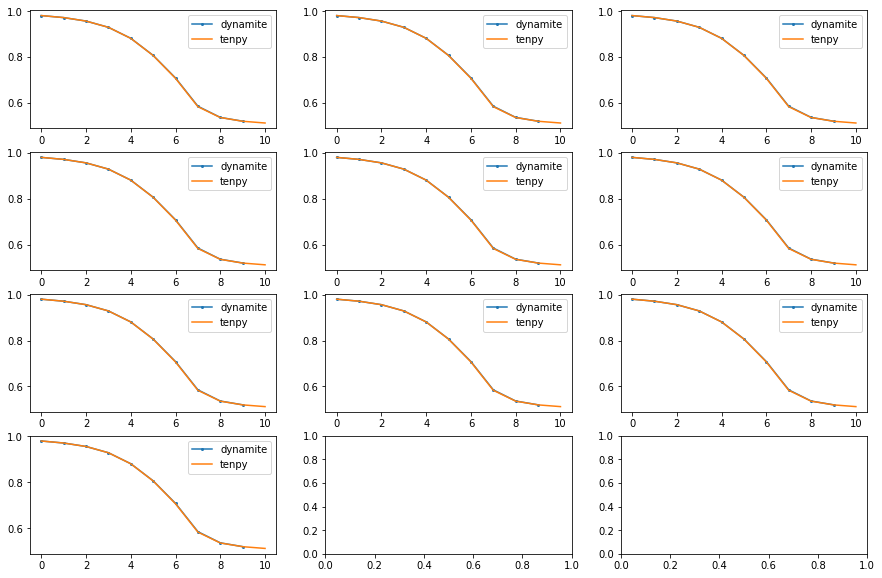

In [187]:
# benchmark ground state dynamics 

fig, ax = plt.subplots(4, 3, figsize=(15,10))
for i in range(10):
    ax[i//3,i%3].plot(data[0],(1-z0[:,i])/2,marker='o',markersize = ms,ls = ls,label='dynamite')
    ax[i//3,i%3].plot(t_tenpy,1-np.array(data_tenpy['zg'])[:,i],markersize = ms,ls = ls,label='tenpy')
    ax[i//3,i%3].legend()

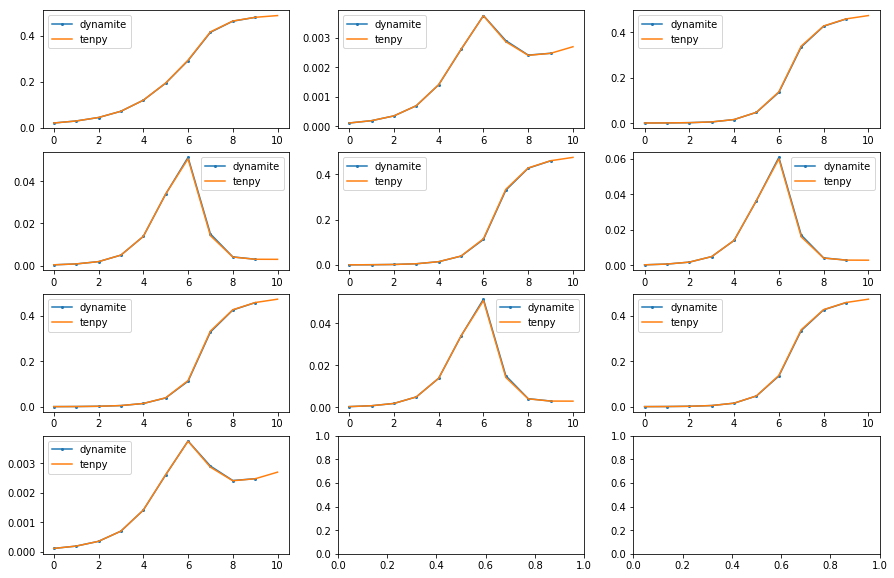

In [229]:
Nt = 10
N =10 
nn = np.zeros((Nt,N))
for t in range(Nt):
    for i in range(N):
        nn[t,i]= (1+z0[t,i]+z0[t,0]+zz0[t,i])/4
        
        
# benchmark rydberg state correlation 

fig, ax = plt.subplots(4, 3, figsize=(15,10))
for i in range(10):
    ax[i//3,i%3].plot(data[0],nn[:,i],marker='o',markersize = ms,ls = ls,label='dynamite')
    ax[i//3,i%3].plot(t_tenpy,np.array(data_tenpy['zzg'])[:,0,i],markersize = ms,ls = ls,label='tenpy')
    ax[i//3,i%3].legend()